<a href="https://colab.research.google.com/github/markcastor/Real-Estate-Price-Prediction/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real Estate Price Prediction

 This is the process of estimating or forecasting the future prices of real estate properties, such as houses, apartments, or commercial buildings.
 Our main goal is to provide accurate property rates to buyers, sellers, investors, and real estate professionals to make informed decisions about real estate transactions.

Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading the Dataset

In [ ]:
real_estate_data = pd.read_csv("Real_Estate.csv")

real_estate_data_head = real_estate_data.head()
data_info = real_estate_data.info()

print(real_estate_data_head)
print (data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

We can see that the data has the following collumns

    Transaction date: The date of the real estate transaction.
    House age: Age of the house in years.
    Distance to the nearest MRT station: Distance to the nearest Mass Rapid Transit station in meters.
    Number of convenience stores: Number of convenience stores in the vicinity.
    Latitude: Latitude of the property location.
    Longitude: Longitude of the property location.
    House price of unit area: House price of unit area.


Now lets check for missing values

In [ ]:
print(real_estate_data.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


Our data has no missing values

Descriptive statistics

In [ ]:
descriptive_stats = real_estate_data.describe()
print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

##Visualization

Now lets visualize our data using histograms for all numerical features

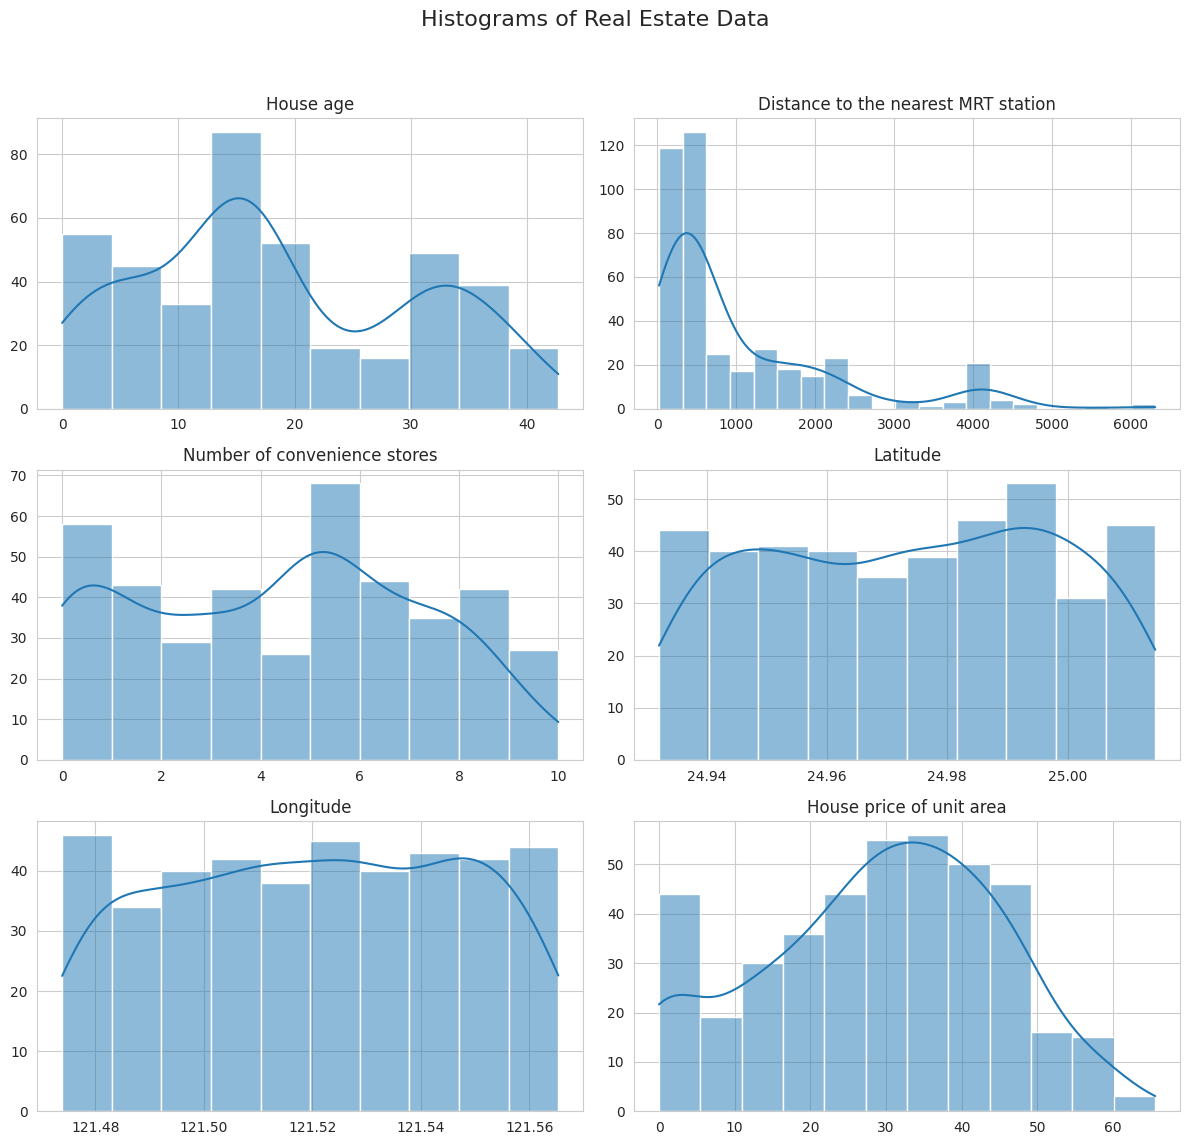

In [ ]:
#setting the style of the plot
sns.set_style("whitegrid")
#Lets creat the histogram for the numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.suptitle("Histograms of Real Estate Data", fontsize=16)

#Lets choose our nemmerical columns
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From the above visualizations we can conclude that:-

House Age:shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).

Distance to the Nearest MRT Station:Here alot of properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.

Number of Convenience Stores: This shows a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.

Latitude and Longitude:They both indicate a relatively concentrated distributions, indicating that the properties are located in a geographically limited area.

House Price of Unit Area:This shows a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

Now lets create scatter plots to explore the relationships between these variables and the house price

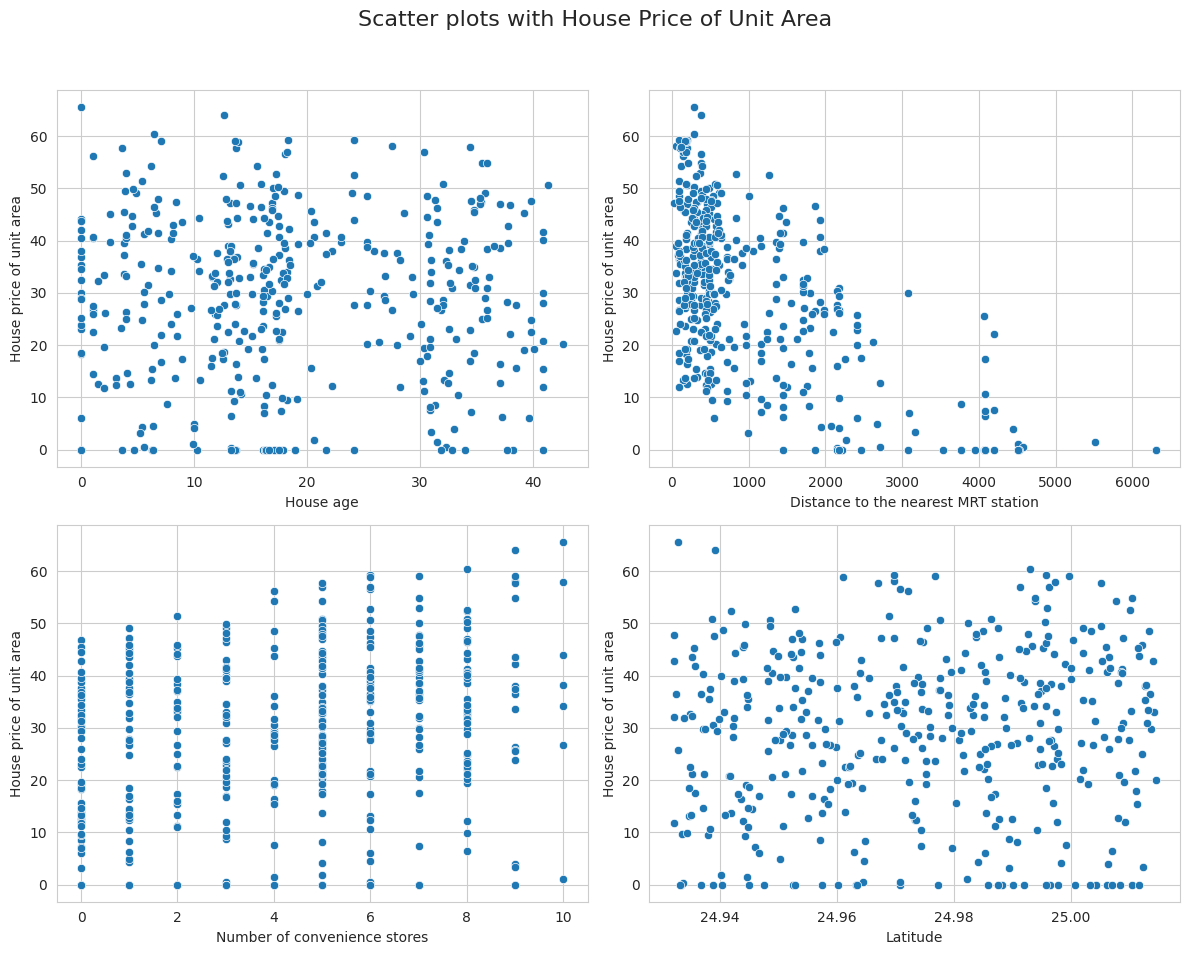

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10) )
fig.suptitle('Scatter plots with House Price of Unit Area', fontsize=16)

#Now Scatter plot for each variable against the house price
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


From the above visualizations we can conclude that:-


   
   
  **House Age vs. House Price**:We can see that there doesn’t seem to be a strong linear relationship between house age and price.But, it appears that very new and very old houses might have higher prices.

  **Distance to the Nearest MRT Station vs. House Price**: Here we can see a trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease,suggesting a strong negative relationship between these two variables.

  **Number of Convenience Stores vs. House Price**: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.

  **Latitude vs. House Price**: Here we get no strong linear relationship, but there is a pattern where certain latitudes correspond to higher or lower house prices. It could be indicative of specific neighbourhoods being more desirable.


Now Lets perforn Correlation Analysis

<ipython-input-9-0848dfbb1a76>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = real_estate_data.corr()


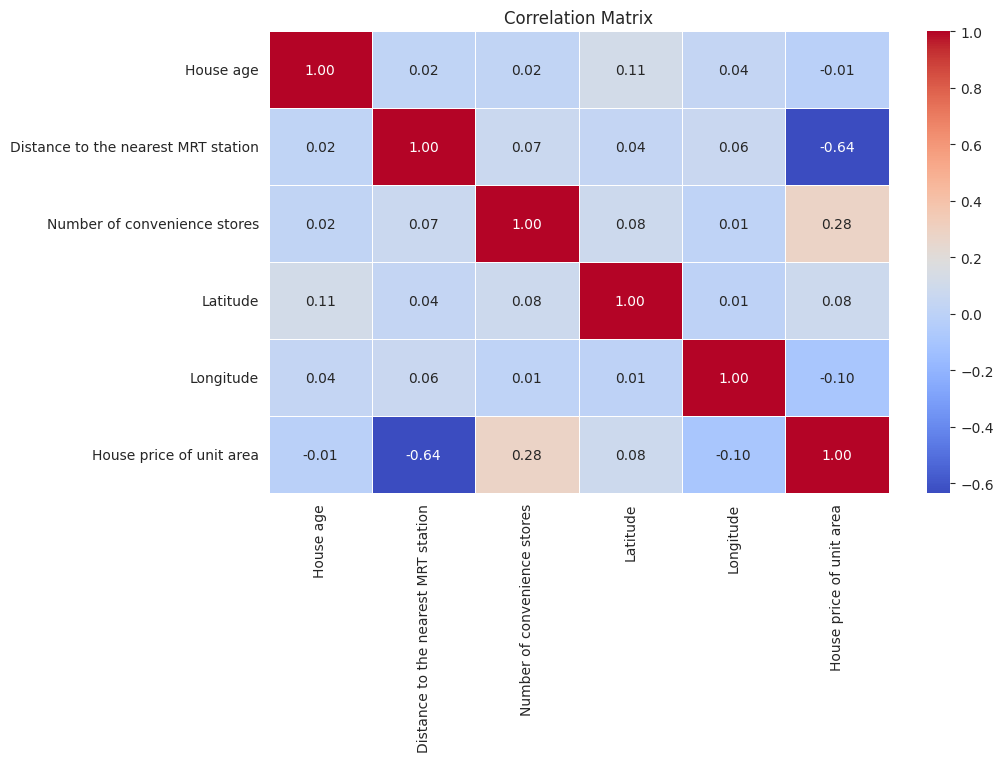

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [ ]:
correlation_matrix = real_estate_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

For the correlation analysis


  House Age: Here we see a very weak negative correlation with house price (-0.012), which implies that age is not a strong predictor of price in this dataset.

  Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.

  Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.

  Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).


##Modeling

Lets build a Linear Regression Model topredict the real eastate price

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Lets select features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model initialization
model = LinearRegression()

#Lets train the model
model.fit(X_train, y_train)

LinearRegression()

Now Lets visualize the actual versus predicted values

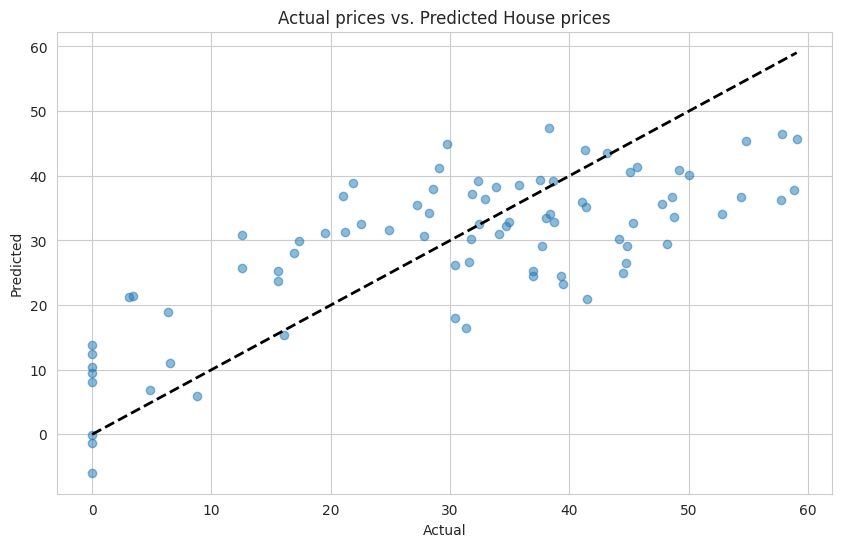

In [ ]:
y_pred_lr = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual prices vs. Predicted House prices')
plt.show()


we can observe that alot of points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.

